In [1]:
import sys, os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
#replace with folder with files
base_folder = '../data'
data_w2v = pd.read_csv(os.path.join(base_folder,'experiments','experiments_w2v.csv'))
data_d2v = pd.read_csv(os.path.join(base_folder,'experiments_d2v','experiments_d2v.csv'))
data_sw = pd.read_csv(os.path.join(base_folder,'experiments_sw','experiments_sw.csv'))
data_ft = pd.read_csv(os.path.join(base_folder,'experiments_ft','experiments_ft.csv'))
data_dft = pd.read_csv(os.path.join(base_folder,'experiments_dft','experiments_dft.csv'))

In [5]:
data = data_w2v.append(data_sw).append(data_d2v).append(data_ft).append(data_dft)
data.head()

,algorithm,avg_score,epoch,experiment,learning_rate,mc-30,mc-30_oov,men-tr-3k,men-tr-3k_oov,mturk-287,...,weak_draws,window_size,ws-353-all,ws-353-all_oov,ws-353-rel,ws-353-rel_oov,ws-353-sim,ws-353-sim_oov,yp-130,yp-130_oov
0,w2v,0.169,1,1,0.025,0.467,0,0.263,0,0.404,...,NaN,3,0.338,0,0.290,0,0.417,0,0.159,3
1,w2v,0.196,3,1,0.025,0.517,0,0.340,0,0.410,...,NaN,3,0.307,0,0.217,0,0.409,0,0.076,3
2,w2v,0.187,5,1,0.025,0.558,0,0.333,0,0.453,...,NaN,3,0.299,0,0.228,0,0.382,0,0.086,3
3,w2v,0.186,7,1,0.025,0.437,0,0.330,0,0.458,...,NaN,3,0.337,0,0.279,0,0.426,0,0.056,3
4,w2v,0.169,1,1,0.025,0.464,0,0.288,0,0.441,...,NaN,3,0.252,0,0.162,0,0.352,0,0.140,3


In [6]:
data = data[data['negative_sampling'] != 25] #only one of the models was trained with this value
data = data[data['epoch'] > 1] #not very useful for results
data = data[(data['ngrams'] != 1)] # poor performance
data = data[data['run']==1] # only considering 1 run because of the amount

# easier to graph
data.loc[data['sampling'] == 0.0001, 'sampling'] = -4
data.loc[data['sampling'] == 0.001, 'sampling'] = -3
data.loc[data['sampling'] == 0.01, 'sampling'] = -2
data.loc[data['sampling'] == 0.1, 'sampling'] = -1
data.loc[:,'sampling'] = data['sampling'].astype('int')

# original time is in seconds
data['time'] /= 60
data = data.round(3)
data.head()

,algorithm,avg_score,epoch,experiment,learning_rate,mc-30,mc-30_oov,men-tr-3k,men-tr-3k_oov,mturk-287,...,weak_draws,window_size,ws-353-all,ws-353-all_oov,ws-353-rel,ws-353-rel_oov,ws-353-sim,ws-353-sim_oov,yp-130,yp-130_oov
1,w2v,0.196,3,1,0.025,0.517,0,0.340,0,0.410,...,NaN,3,0.307,0,0.217,0,0.409,0,0.076,3
2,w2v,0.187,5,1,0.025,0.558,0,0.333,0,0.453,...,NaN,3,0.299,0,0.228,0,0.382,0,0.086,3
3,w2v,0.186,7,1,0.025,0.437,0,0.330,0,0.458,...,NaN,3,0.337,0,0.279,0,0.426,0,0.056,3
13,w2v,0.147,3,2,0.025,0.318,0,0.262,0,0.393,...,NaN,3,0.237,0,0.141,0,0.320,0,0.079,3
14,w2v,0.141,5,2,0.025,0.380,0,0.244,0,0.399,...,NaN,3,0.277,0,0.200,0,0.363,0,0.026,3


## Word2vec

In [8]:
data_w2v = data[data['algorithm']=='w2v']
data_w2v.head()


,algorithm,avg_score,epoch,experiment,learning_rate,mc-30,mc-30_oov,men-tr-3k,men-tr-3k_oov,mturk-287,...,weak_draws,window_size,ws-353-all,ws-353-all_oov,ws-353-rel,ws-353-rel_oov,ws-353-sim,ws-353-sim_oov,yp-130,yp-130_oov
1,w2v,0.196,3,1,0.025,0.517,0,0.340,0,0.410,...,NaN,3,0.307,0,0.217,0,0.409,0,0.076,3
2,w2v,0.187,5,1,0.025,0.558,0,0.333,0,0.453,...,NaN,3,0.299,0,0.228,0,0.382,0,0.086,3
3,w2v,0.186,7,1,0.025,0.437,0,0.330,0,0.458,...,NaN,3,0.337,0,0.279,0,0.426,0,0.056,3
13,w2v,0.147,3,2,0.025,0.318,0,0.262,0,0.393,...,NaN,3,0.237,0,0.141,0,0.320,0,0.079,3
14,w2v,0.141,5,2,0.025,0.380,0,0.244,0,0.399,...,NaN,3,0.277,0,0.200,0,0.363,0,0.026,3


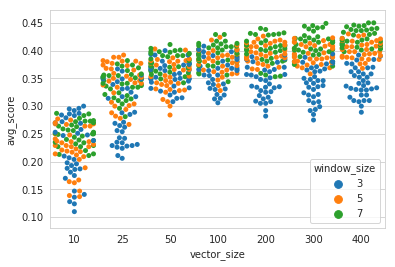

In [9]:
sns.swarmplot("vector_size", "avg_score", data=data_w2v, hue='window_size')

## Other

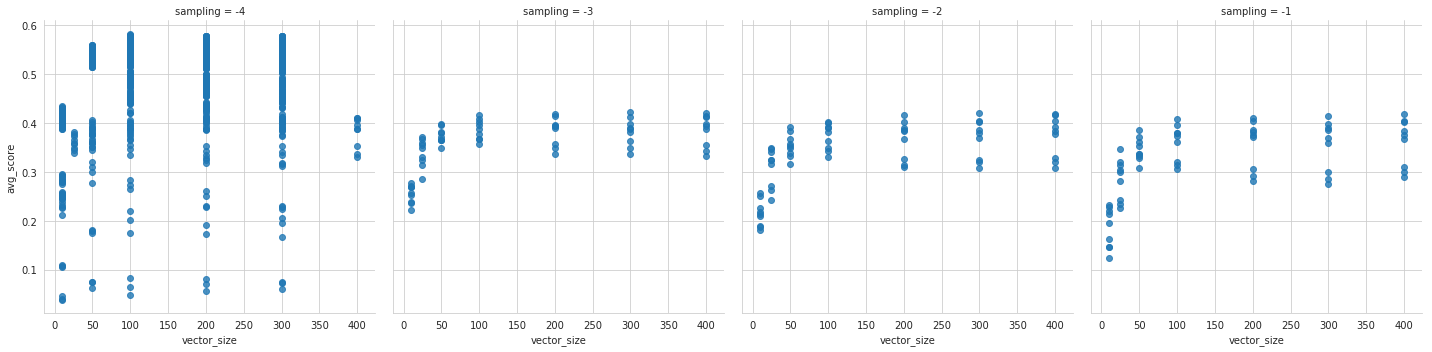

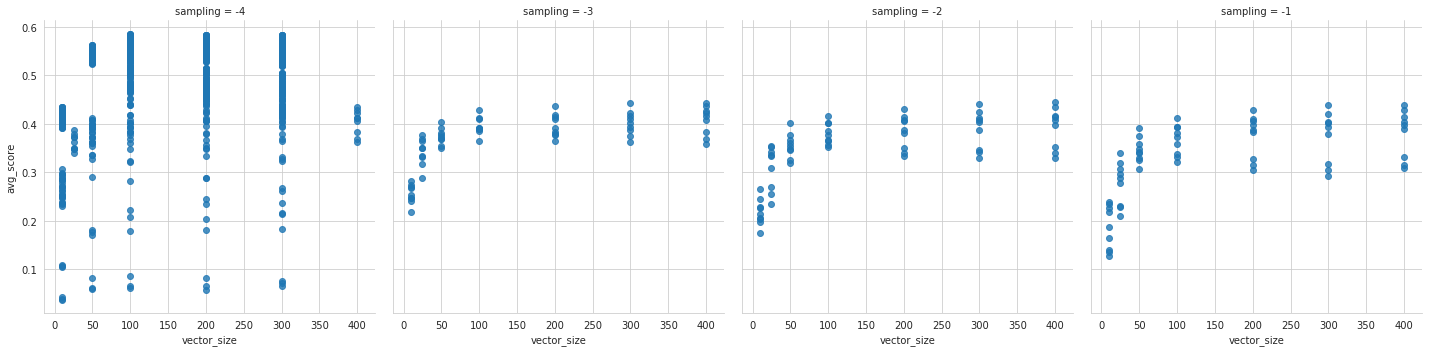

In [10]:
sns.lmplot("vector_size", "avg_score", data=data[data['epoch'] == 3], fit_reg=False, col='sampling')
sns.lmplot("vector_size", "avg_score", data=data[data['epoch'] == 5], fit_reg=False, col='sampling')

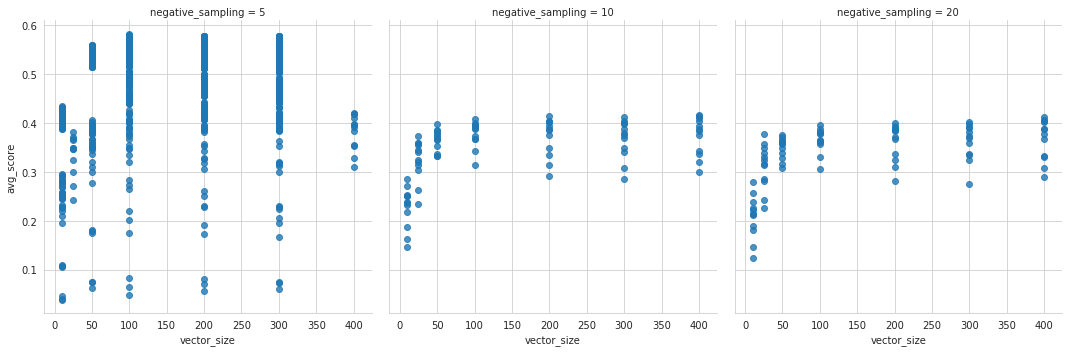

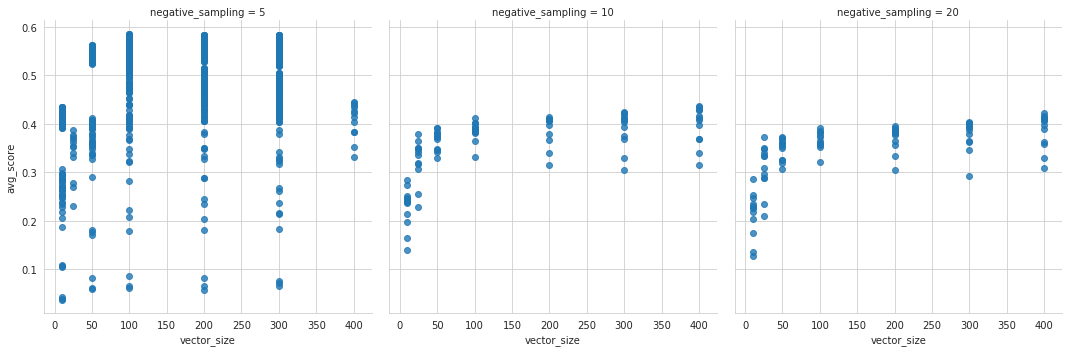

In [11]:
sns.lmplot("vector_size", "avg_score", data=data[data['epoch'] == 3], fit_reg=False, col='negative_sampling')
sns.lmplot("vector_size", "avg_score", data=data[data['epoch'] == 5], fit_reg=False, col='negative_sampling')

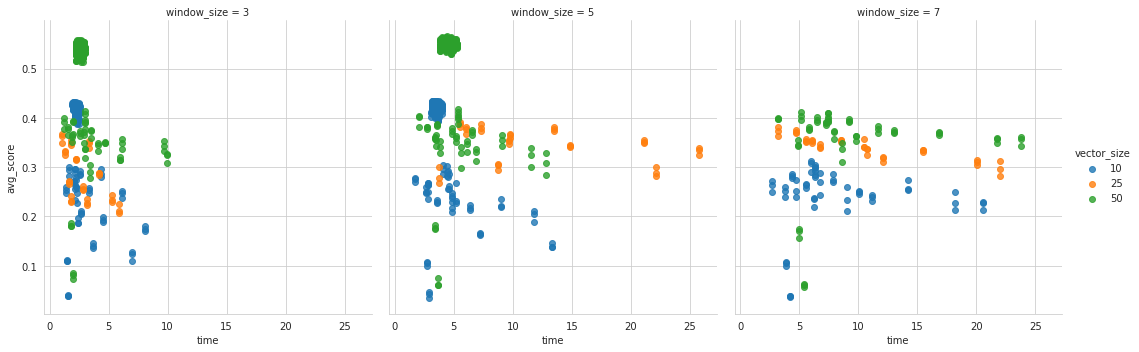

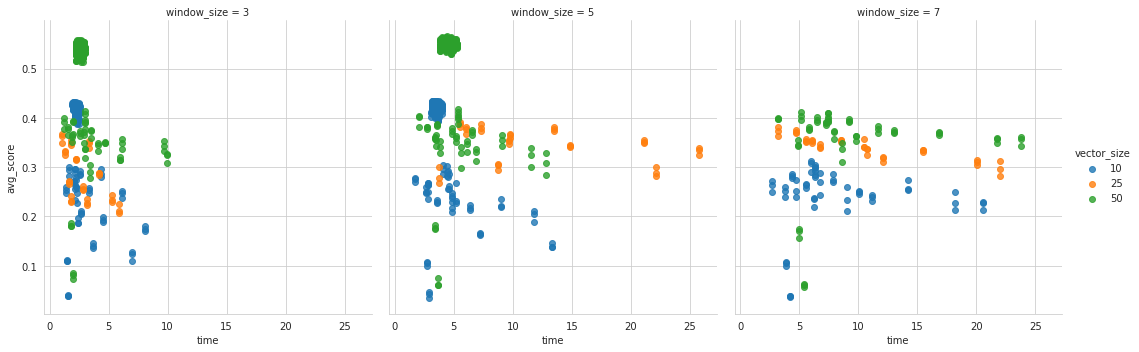

In [12]:
sns.lmplot("time", "avg_score", data=data[data['vector_size'].isin([10, 25, 50])], fit_reg=False, col='window_size',hue='vector_size')
sns.lmplot("time", "avg_score", data=data[data['vector_size'].isin([10, 25, 50])], fit_reg=False, col='window_size',hue='vector_size')

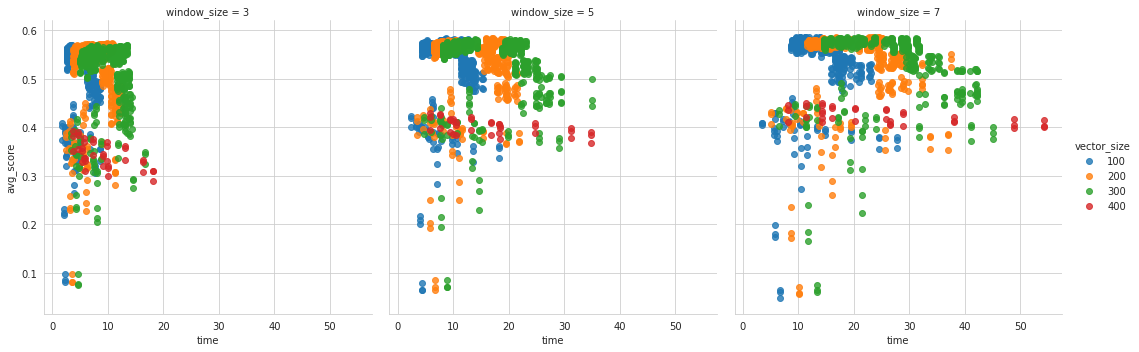

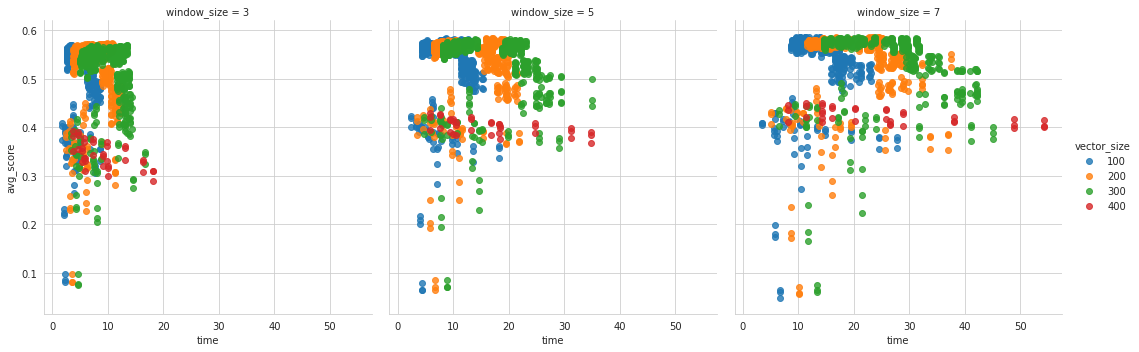

In [13]:
sns.lmplot("time", "avg_score", data=data[data['vector_size'].isin([100, 200, 300, 400])], fit_reg=False, col='window_size',hue='vector_size')
sns.lmplot("time", "avg_score", data=data[data['vector_size'].isin([100, 200, 300, 400])], fit_reg=False, col='window_size',hue='vector_size')

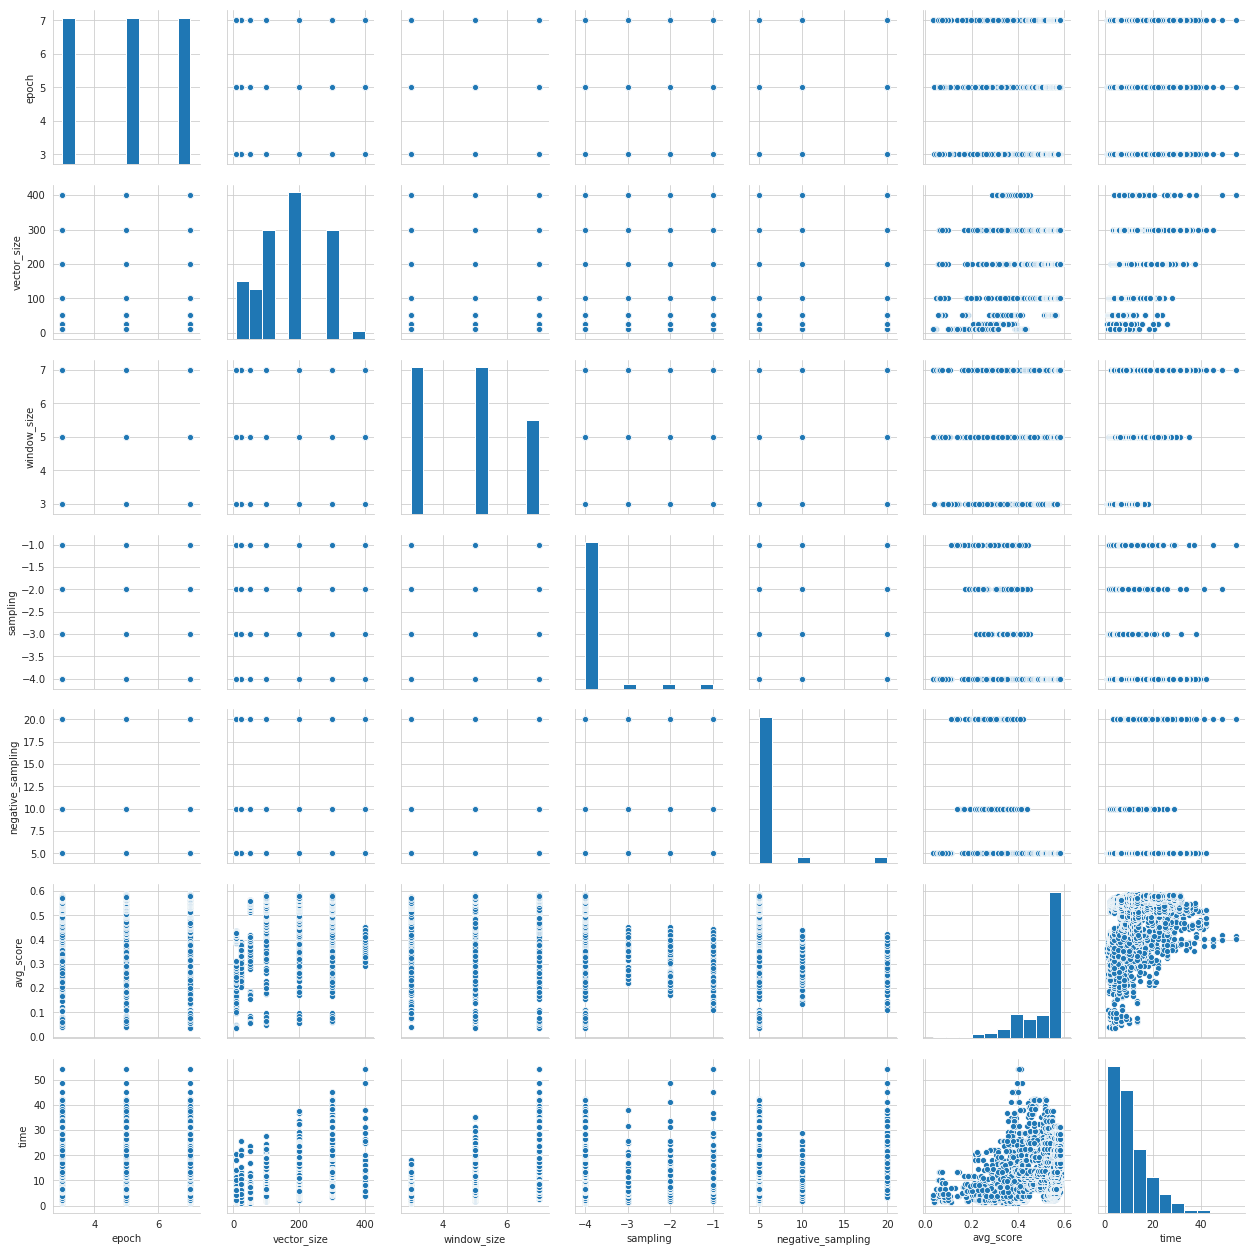

In [14]:
sns.pairplot(data[['epoch', 'vector_size', 'window_size', 'sampling', 'negative_sampling', 'avg_score', 'time']])

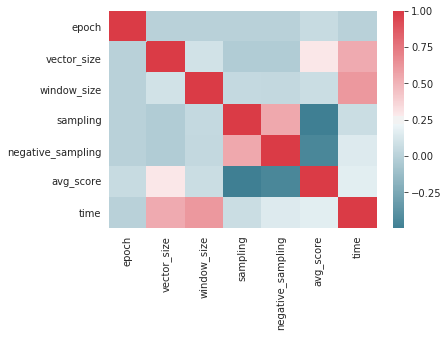

In [15]:
corr = data[['epoch', 'vector_size', 'window_size', 'sampling', 'negative_sampling', 'avg_score', 'time']].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [16]:
data.groupby('algorithm')['avg_score'].max()

algorithm
d2v    0.587
dft    0.587
ft     0.492
sw     0.444
w2v    0.450
Name: avg_score, dtype: float64